# Gradient Descent

## Utilities

In [1]:
# Download the helper module which generates problems
! wget https://raw.githubusercontent.com/solalatus/FS_algorithms_and_software_concepts_helper_functions/main/Lab-Day-5/problems.py

--2021-04-26 17:55:56--  https://raw.githubusercontent.com/solalatus/FS_algorithms_and_software_concepts_helper_functions/main/Lab-Day-5/problems.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7370 (7.2K) [text/plain]
Saving to: ‘problems.py.4’

problems.py.4       100%[===================>]   7.20K  --.-KB/s    in 0s      

2021-04-26 17:55:56 (91.2 MB/s) - ‘problems.py.4’ saved [7370/7370]



In [2]:
! pip install jax

In [3]:
from problems import * # import problem generating helpers

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problems

The problem generating functions in the imported `problems` module always return an (f, f') pair containing a function to be miminized with its derivative. As a side effect, calling the calls also visualize the returned pair of functions.

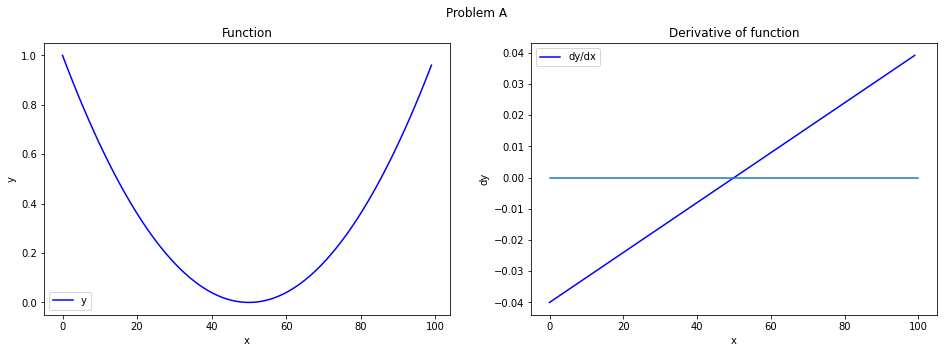

In [5]:
fn_A, d_fn_A = problem_A()

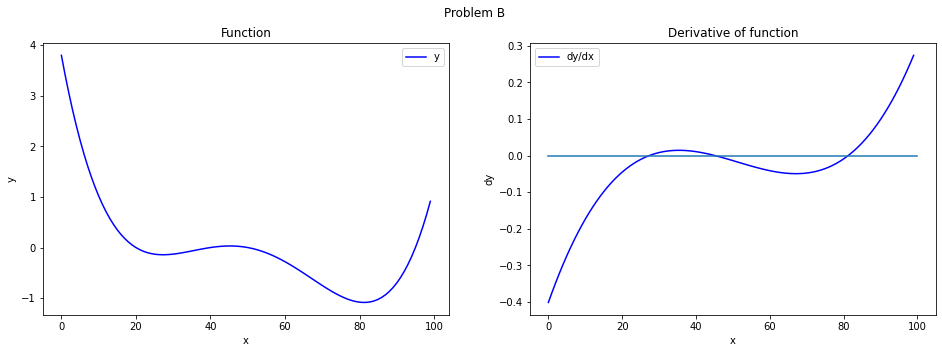

In [6]:
fn_B, d_fn_B = problem_B()

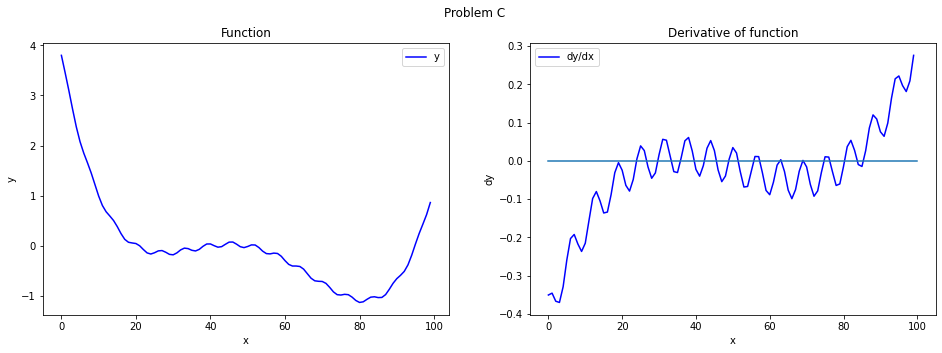

In [7]:
fn_C, d_fn_C = problem_C()

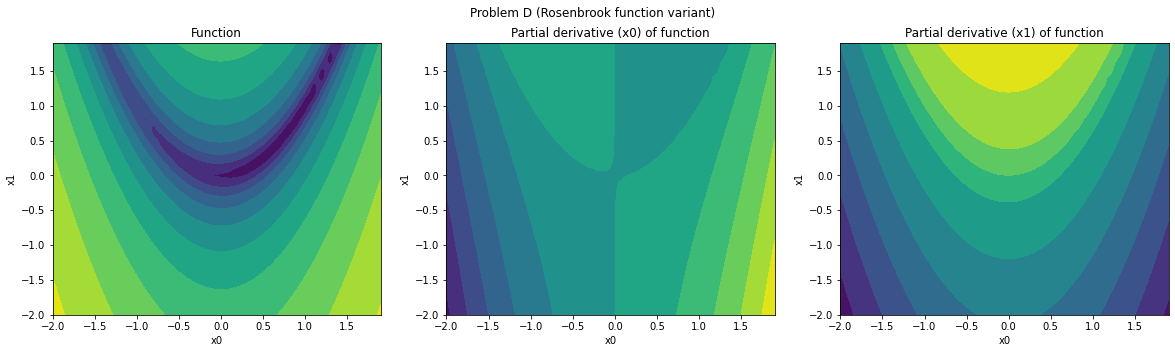

In [8]:
fn_D, d_fn_D = problem_D() # A two-variable non-convex function, see https://en.wikipedia.org/wiki/Rosenbrock_function

## Gradient descent
### Simple implementation

The first task is to complete a simple implementation of gradient descent.

In [9]:
def gradient_descent(x_start, fn, d_fn, lr=0.1, early_stop=0.000001):
    """Perform gradient descent on a function.

    Args:
      x_start: The initial position.
      fn: The function to minimize.
      d_fn: fn's first derivative.
      lr: the learning rate.
      early_stop: early_stopping threshold.
    """
    opt_history = [x_start] # this will be the list of x positions traversed 
    output = [fn(x_start)] # and this the list of corresponding fn(x) values
     
    i = 0 # a counter for GD steps
    stop_counter = 0 # this is for early stopping: we count the number of consecutive steps in which no significant 
                     # improvement was made. "Significant" is defined by the argument 'early_stop'.
    while True: # the training loop taking the series of GD steps
        i += 1 
        
        # TASK: Calculate the next x value and assign it to the variable x_next.
        # Recall that the next x is always the last x minus the gradient multiplied by the learning rate,
        # and all earlier x values are stored in the variable opt_history.
        
        ....
                
        # Save the new x and fn(x) values
        opt_history.append(x_next)
        output.append(fn(x_next))
        
        # Early stopping: if improvement is under the threshold we increment the stop counter
        if  output[-2] < output[-1] + early_stop:
            stop_counter += 1
            if stop_counter > 5: # no improvement for 5 steps:
                break             # patience has run out
            
    print('Optimization terminated after', i, 'iteration.')
    print('Last position(x):', opt_history[-1])
    print('Last value(y):', output[-1])
    
    return opt_history

## GD on the example problems

Now we can run our GD implementation on the provided example problems.

Optimization terminated after 4564 iteration.
Last position(x): 48.75574152319318
Last value(y): 0.0006192716628422513


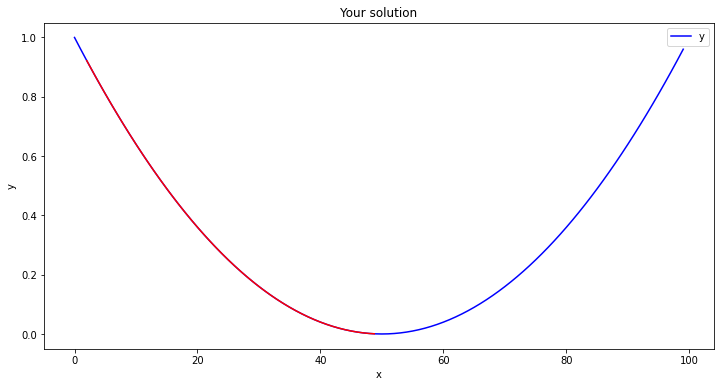

In [10]:
# Run gradient descent to find minimum
x_start = 2
opt_history = gradient_descent(x_start=x_start,
                               fn=fn_A,
                               d_fn=d_fn_A,
                               lr=1)

# Plot solution
solution_plotter_1D(fn=fn_A, history=opt_history)

High step size makes convergence less stable.

Optimization terminated after 20 iteration.
Last position(x): 49.99824504394877
Last value(y): 1.2319482966985747e-09


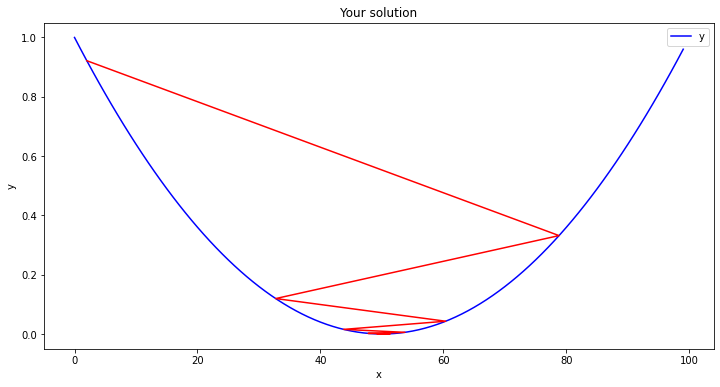

In [11]:
# Run gradient descent to find minimum
x_start = 2
opt_history = gradient_descent(x_start=x_start,
                               fn=fn_A,
                               d_fn=d_fn_A,
                               lr=2000)

# Plot solution
solution_plotter_1D(fn=fn_A, history=opt_history)

Functions with (multiple) local minimum are problematic for the gradient descent algorithm. It depends on the learning rate choice where the algorthm settles.

For many real life problems we don't have a nicely defined low dimensional function. In these cases we should expect many local minima. Often we can't know if we have found a local or a global minimum.

Optimization terminated after 122 iteration.
Last position(x): 27.215659463595554
Last value(y): -0.14246894146607114


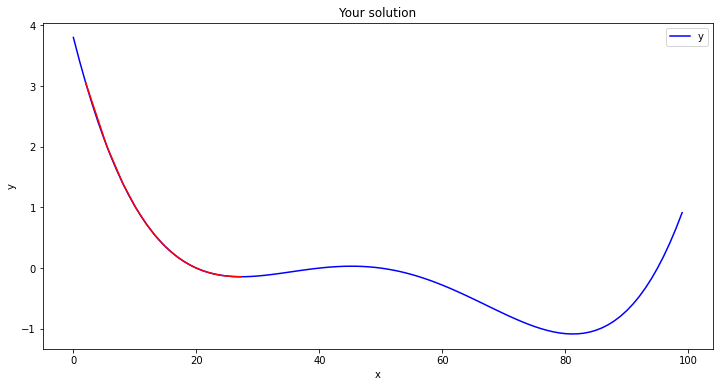

In [12]:
# Run gradient descent to find minimum
x_start = 2
opt_history = gradient_descent(x_start=x_start,
                               fn=fn_B,
                               d_fn=d_fn_B,
                               lr=10)

# Plot solution
solution_plotter_1D(fn=fn_B, history=opt_history)

Optimization terminated after 22 iteration.
Last position(x): 27.280229716455672
Last value(y): -0.14247667236648345


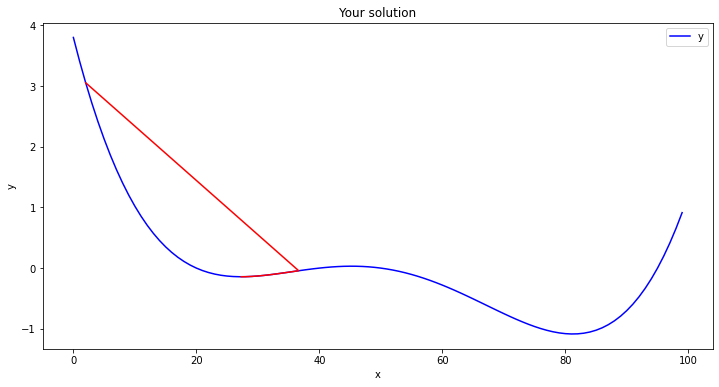

In [13]:
# Run gradient descent to find minimum
x_start = 2
opt_history = gradient_descent(x_start=x_start,
                               fn=fn_B,
                               d_fn=d_fn_B,
                               lr=100)

# Plot solution
solution_plotter_1D(fn=fn_B, history=opt_history)

Optimization terminated after 14 iteration.
Last position(x): 81.22788894632248
Last value(y): -1.0856342237315852


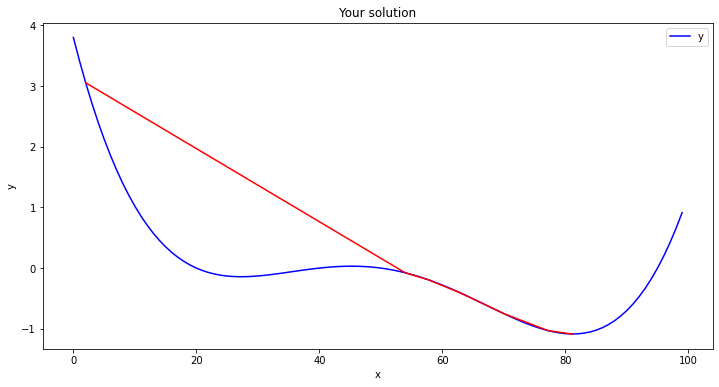

In [14]:
# Run gradient descent to find minimum
x_start = 2
opt_history = gradient_descent(x_start=x_start,
                               fn=fn_B,
                               d_fn=d_fn_B,
                               lr=150)

# Plot solution
solution_plotter_1D(fn=fn_B, history=opt_history)

### Momentum -- no task here, just observe!
Momentum, as its name indicates, adds a kind of phyisical momentum to the GD process:
the update size depends partly on the previous updates sizes. Momentun can make convergence more stable even with small learning rates, it also helps the gradient descent algorithm navigate through saddle points (no gradient regions which are no minima) which are often found in high dimension optimization problems (for example: neural networks for image recognition).

In [15]:
def gradient_descent_with_momentum(x_start, fn, d_fn, lr=0.1, momentum_factor=0.9, early_stop=0.000001):
    opt_history = [x_start]
    output = [fn(x_start)]
    
    i = 0
    stop_counter = 0
    momentum = 0
    while True:
        i += 1
        
        # Calculate next step
       
        update = - lr * d_fn(opt_history[-1]) # the standard GD update
        x_next = opt_history[-1] + update + momentum # the crucial difference compared to vanilla GD: we also add the momentum term
        
        # Update momentum
        momentum = momentum_factor * update # the momentum is a decaying sum of past updates
        
        
        # Save values
        opt_history.append(x_next)
        output.append(fn(x_next))
        
        # Early stop
        if  output[-2] < output[-1] + early_stop:
            stop_counter += 1
            if stop_counter > 5:
                break
            
    print('Optimization terminated after', i)
    print('Last position(x):', opt_history[-1])
    print('Last value(y):', output[-1])
    
    return opt_history

Optimization terminated after 14 iteration.
Last position(x): 75.85094540336942
Last value(y): -0.9693146957801803


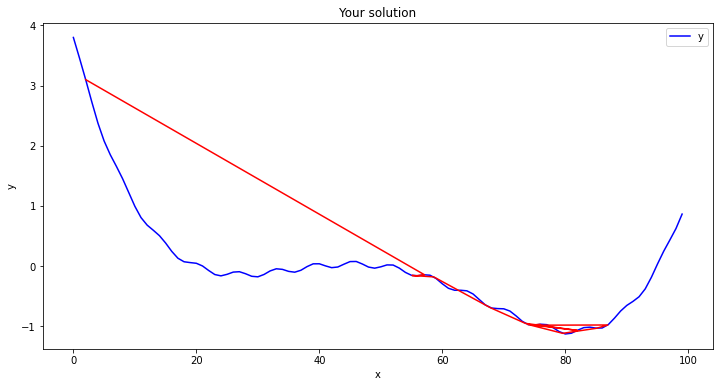

In [16]:
# Run gradient descent to find minimum
x_start = 2
opt_history = gradient_descent(x_start=x_start,
                               fn=fn_C,
                               d_fn=d_fn_C,
                               lr=150)

# Plot solution
solution_plotter_1D(fn=fn_C, history=opt_history)

Optimization terminated after 16
Last position(x): 78.09888272575223
Last value(y): -1.0298587089005886


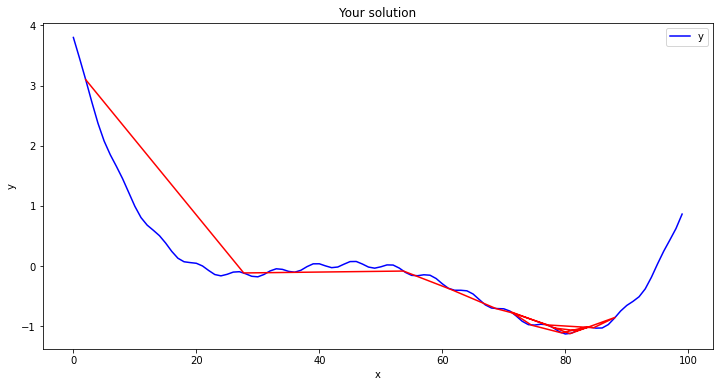

In [17]:
# Run gradient descent with momentum to find minimum
x_start = 2
opt_history = gradient_descent_with_momentum(x_start=x_start,
                                             fn=fn_C,
                                             d_fn=d_fn_C,
                                             lr=70,
                                             momentum_factor=0.9)

# Plot solution
solution_plotter_1D(fn=fn_C, history=opt_history)

### Multi dimensional examples

Optimization terminated after 16
Last position(x): [-0.82500323  0.73848963]
Last value(y): 1.5401750091992688


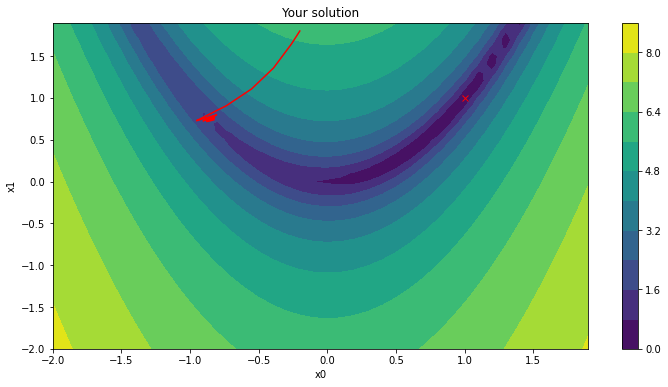

In [18]:
# Run gradient descent with momentum to find global minimum (x0=1, x1=1)
x_start = np.asarray([-0.2, 1.8])
opt_history = gradient_descent_with_momentum(x_start=x_start,
                                             fn=fn_D,
                                             d_fn=d_fn_D,
                                             lr=0.003,
                                             momentum_factor=0.9,
                                             early_stop=0.001)

# Plot solution
solution_plotter_2D(fn=fn_D, history=opt_history)

### The subway optimization problem
Let's see the difference between our genetic algorithm and gradient descent result.

In [19]:
fn_subway, d_fn_subway = problem_subway()

In [20]:
# Run gradient descent with momentum to find minimum
x_start = np.asarray([10, 1, 1])
opt_history = gradient_descent_with_momentum(x_start=x_start,
                                             fn=fn_subway,
                                             d_fn=d_fn_subway,
                                             lr=0.01,
                                             momentum_factor=0.9,
                                             early_stop=0.001)

/usr/local/lib/python3.7/dist-packages/jax/_src/numpy/lax_numpy.py:2927: UserWarning: Explicitly requested dtype float requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "array")


Optimization terminated after 247
Last position(x): [11.84773318  0.36832054  0.27345526]
Last value(y): 15.324908
